In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv('heart-3.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [131]:
data.columns = ['age', # continious
                'sex', # binary
                'chest_pain_type', #categorical
                'resting_blood_pressure',# continious
                'cholesterol',# continious
                'fasting_blood_sugar',# binary
                'rest_ecg', # categorical
                'max_heart_rate_achieved',# continious
                'exercise_induced_angina', # binary
                'st_depression',# continious
                'st_slope', # categorical
                'num_major_vessels',  # categorical
                'thalassemia', # categorical
                'target']
categorical_fields = [ 'chest_pain_type','rest_ecg','st_slope','num_major_vessels','thalassemia']
continious_fields = [ 'age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


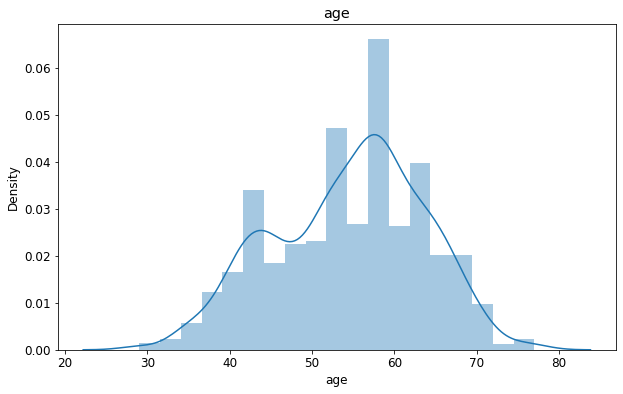

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


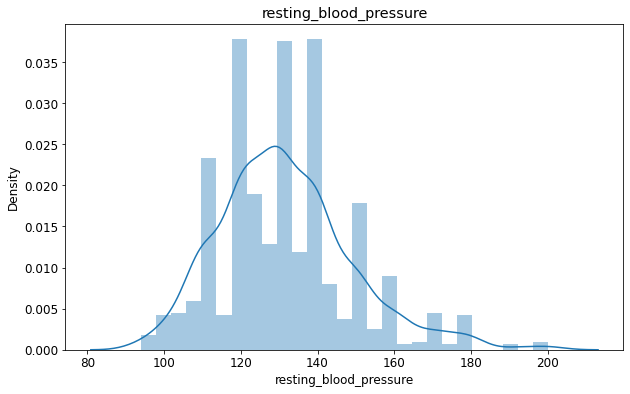

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


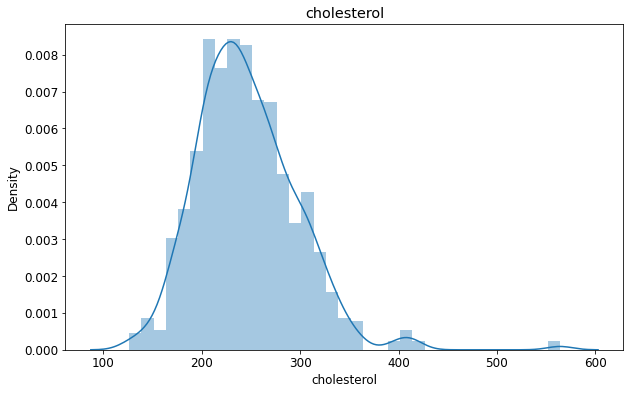

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


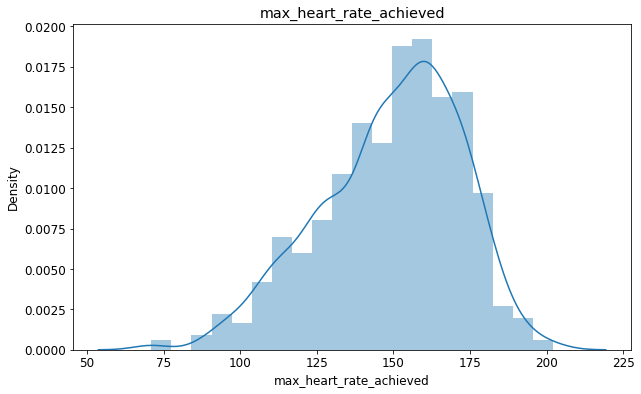

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


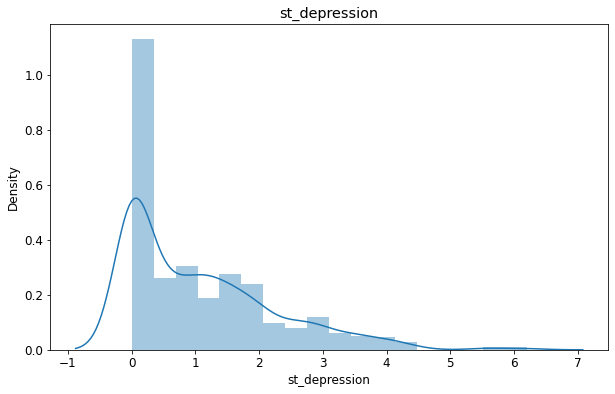

In [132]:
# plotting normal distribution of continious variables
for col in continious_fields:
    plt.figure(figsize=(10,6))
    sns.distplot(data[col])
    plt.title(col)
    plt.show()
    

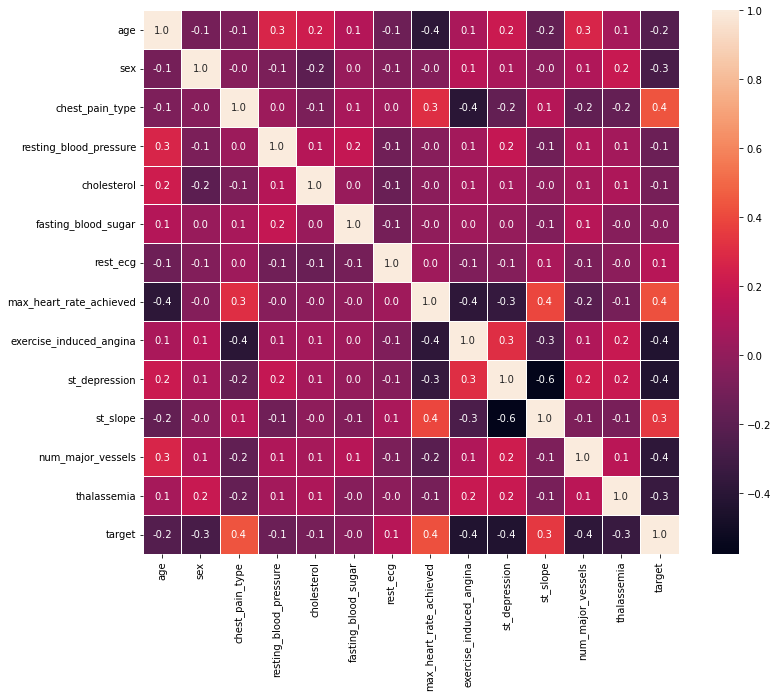

In [9]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

there seems to be little to no linear relationship between the data fields 

In [14]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
# convert categorical variables to dummy variables, and drop the original categorical variables.
data_categorical = pd.get_dummies(data = data,columns = categorical_fields )

In [16]:
data_categorical

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,chest_pain_type_0,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,52,1,125,212,0,168,0,1.0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,1,0,...,1,1,0,0,0,0,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,0,1,...,0,0,1,0,0,0,0,0,0,1
1022,47,1,110,275,0,118,1,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0.0,1,1,...,1,1,0,0,0,0,0,0,1,0


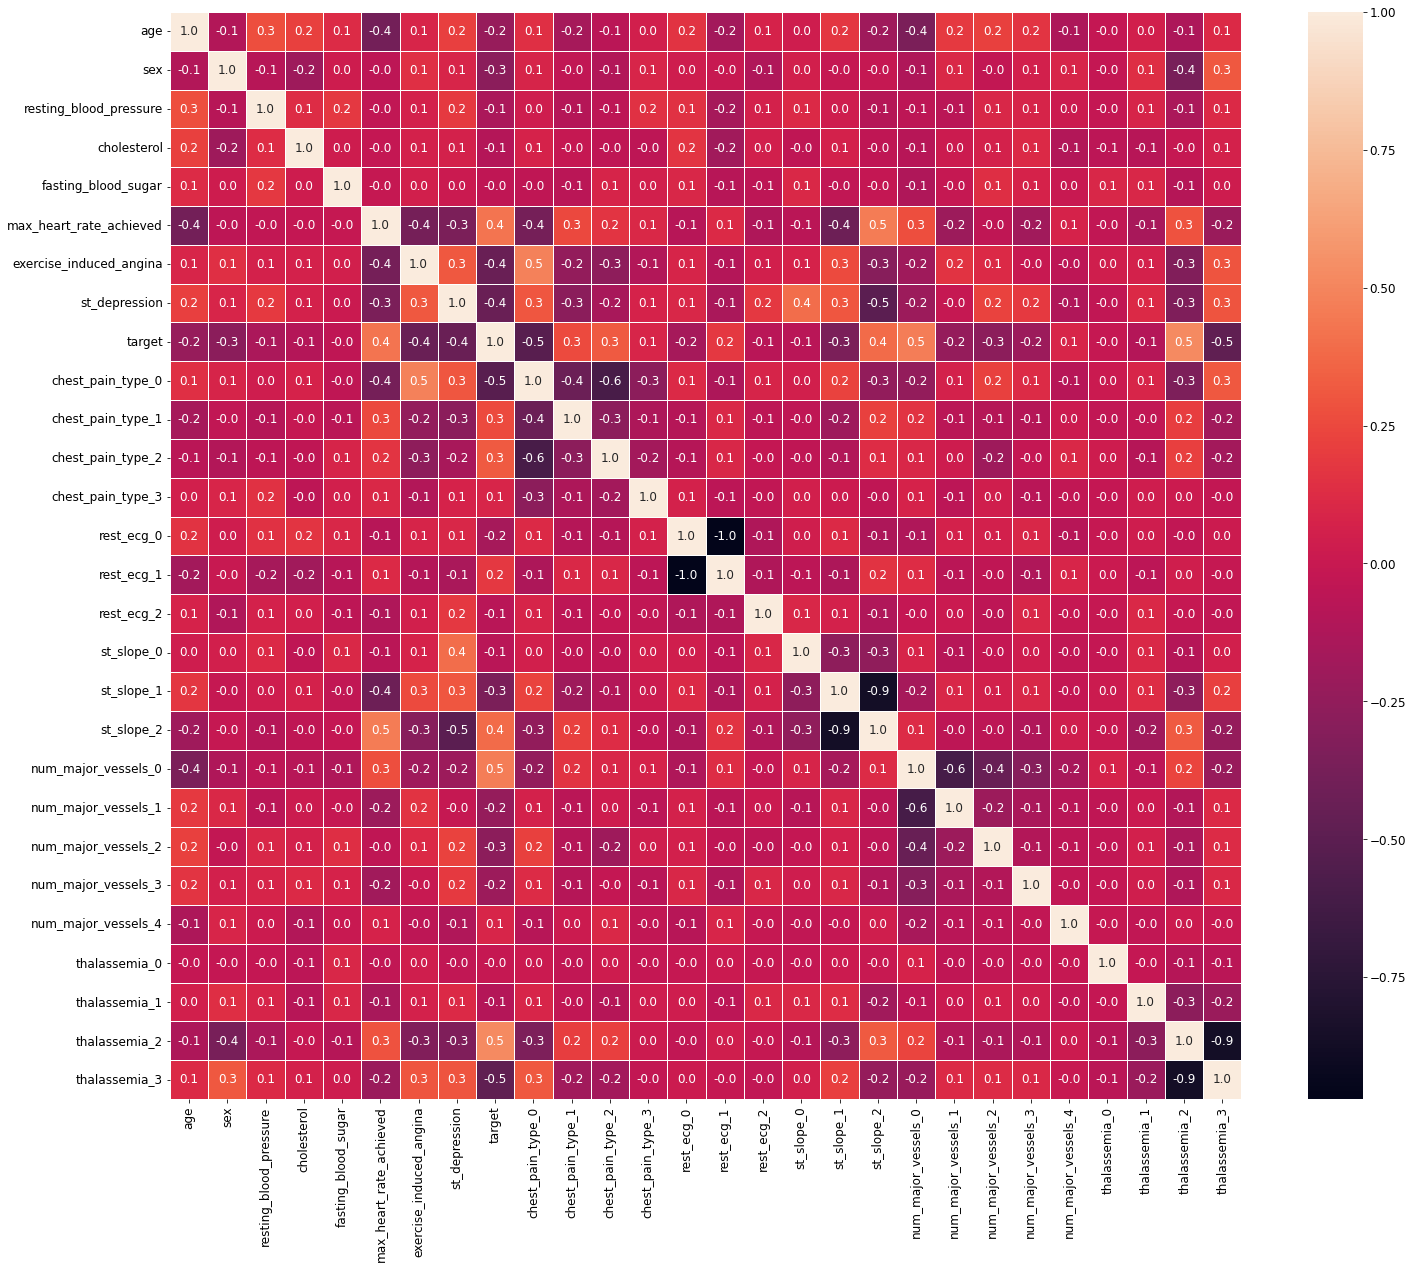

In [96]:
f,ax=plt.subplots(figsize=(24,20))
sns.heatmap(data_categorical.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

In [21]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = data_categorical.drop('target',axis=1)
y = data_categorical['target']

In [101]:
# normalize the data  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_categorical_scaled = scaler.fit_transform(X)
data_categorical_scaled


array([[0.47916667, 1.        , 0.29245283, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.43396226, ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.48113208, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       [0.4375    , 0.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       [0.52083333, 1.        , 0.24528302, ..., 0.        , 0.        ,
        1.        ]])

In [113]:
# split data into train and test and validation
X_train, X_test, y_train, y_test = train_test_split(data_categorical_scaled, y, test_size=0.2, random_state=7)


In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=25, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, random_state=0)

In [115]:
y_pred = model.predict(X_test)

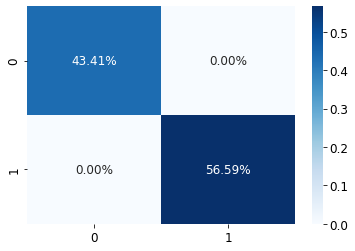

1.0
1.0
1.0


In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test, y_pred)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(ac)

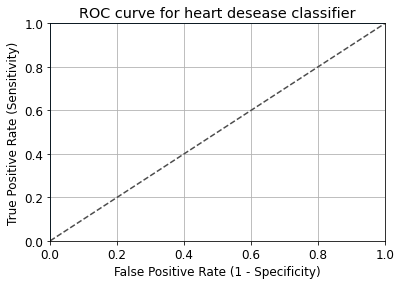

In [117]:
# import roc_curve
from sklearn.metrics import roc_curve, auc
y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for heart desease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [118]:
auc(fpr, tpr)


1.0